### Importing packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Scaling and centering

### Min-max transformation
Here, we look at the Min-max transformation, which transforms the data between 0 and 1. We use the `sklearn.preprocessing` and [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

Here, we will tranform the columns of the matrix provided in the `data` array. In the first step, we need to exatract `data_min_` and `data_max_` attributes. Next, we fit the transformer to the data and transform the row vector  $(2, 2)$. Be careful that the observation is a row of a matrix so it needs to have the corresponding shape.

In the first print, just add the max atribute. In the second, transform the `data`. In the third, transform the row vector $(2, 2)$, that needs to have a `(1,2)` shape.

In [4]:
from sklearn.preprocessing import MinMaxScaler
data = np.array([[-1, 2],  [0, 10], [-0.5, 6], [1, 18]])
scaler = MinMaxScaler()
scaler.fit(data)

# extract the miminum and maximum used to scale the data
print(f' Minimal values: {scaler.data_min_}, Maximum values : { scaler.data_max_}')

# transform the data calling a transform method with the data as an argument
print(f'Transformed data: \n{scaler.transform(data) }')

# transform transform the data point [2,2]
print(f'Transformed vector (2, 2): \n { scaler.transform(np.array([[2 , 2]]))}')


 Minimal values: [-1.  2.], Maximum values : [ 1. 18.]
Transformed data: 
[[0.   0.  ]
 [0.5  0.5 ]
 [0.25 0.25]
 [1.   1.  ]]
Transformed vector (2, 2): 
 [[1.5 0. ]]


Above, we had the `fit` and `transform` methods separately. The `fit` is used to fit the feature transformer to the data, in this case, for min max normalization, to calculate the minimum and maximum of each column. Then the transform function is used to transform any data using the parameters calculated on the data passed to fita. What is one of the reasons for having the `transform` function?

Well, if you have new data coming, some observation $x_1$ needs to be transformed into the same transformed value after the transformation $x^t_1$. If we received a new sample of our data, it would probably have different min and max, and in that case an observation could get transformed into a different observation than if it appeared in the original sample.
However this case, the new value can be out of the $\langle 0, 1 \rangle$ range if it is lower or higher than the old minimum.

Consider the example below. If we add the data. The observation $x_3=(-0.5, 6)$ got transformed into the same value $x^t_3 = (0.25, 0.25)$ as above. For example if we transform an observation that has values out of the original range, e.g., $x_5 = (-2, 20)$, it will fell out of the $\langle 0, 1 \rangle$ interval.

In [5]:
print(f"Transformed (-0.5, 6): {scaler.transform([[-0.5, 6]])}")
print(f"\nTransformed (-2, 20): {scaler.transform([[-2, 20]])}")

Transformed (-0.5, 6): [[0.25 0.25]]

Transformed (-2, 20): [[-0.5    1.125]]


To get the fitting and transformation in one step, you can use the function `fit_transform`.

In [6]:
scaler_ft = MinMaxScaler()
print(f"Transformed data: using fit_transform\n {scaler_ft.fit_transform(data)}")
print(f"Transformed data using transform:\n {scaler_ft.transform(data)}")

Transformed data: using fit_transform
 [[0.   0.  ]
 [0.5  0.5 ]
 [0.25 0.25]
 [1.   1.  ]]
Transformed data using transform:
 [[0.   0.  ]
 [0.5  0.5 ]
 [0.25 0.25]
 [1.   1.  ]]


Notice, that if we merge the new datapoint with the data, we will get a different mapping for each of the points. To do fitting and transforming in a single step, we will use `fit_transform` function.

In [7]:
data2 = np.array([[-1, 2],  [0, 10], [-0.5, 6], [1, 18]])
scaler2 = MinMaxScaler()
print(scaler2.fit_transform(data2))

[[0.   0.  ]
 [0.5  0.5 ]
 [0.25 0.25]
 [1.   1.  ]]


So imagine you divided your data into training and test set. If you would use a different scaler for the training set and a different scaler for the test set, you would get different values after scaling for the same value in training and test set. Therefore you need to fit the transformer (using `fit`or `fit_transform`) on the training set and then transform the test values using the same transformer.

## Cyclical encoding
Cyclical encoding is used to transform cyclical variables as time to numerical values, so the distances among elements are preserved. For example to keep the distance between 23:00 and 1:00 equal same as distance between 23:00 and 21:00 .


To perform cyclical encoding, we will use the following equations:
- $x_{sin} = \sin(\frac{2 \pi x}{\max(x)})$
- $x_{cos} = \cos(\frac{2 \pi x}{\max(x)})$.

For the decimal 24 hour format the $max(x) = 24$, so
$x_{sin} = \sin(\frac{2 \pi x}{24})$.

The task is now to encode the `hours` vector storing hours using cyclical encoding. Below, we have an example of how to perform encoding with the sine function, so you need to add the cosine function.

In [8]:
#@title Creating the data for transformations { display-mode: "code" }
from datetime import datetime
date_list = list(pd.date_range(start='2022-02-01 01:00:00', periods=50, freq='1h'))
hour_list = [d.hour for d in date_list]
hours = np.array(hour_list)

In the cell below first, fill the body of the function **based on the expressions that are used as arguments** of the goniometric functions, i.e., it will not contain any goniometric function. Use the provided parameters and `np.pi` to get the $\pi$ value. Next, calculate the cosine similar to the sine angle of the encoded values.

In [9]:
print(hours)
period = 24

def cycl_encod_fun(x, period):
  return (2*np.pi*x)/period

print("You defined the function correctly" if round(cycl_encod_fun(12,24),5) == round(np.pi, 5) else "The function cycl_encod_fun contains an error" )

data = pd.DataFrame()
data['hour_sin'] = np.sin(cycl_encod_fun(hours, period))
data['hour_cos'] = np.cos(cycl_encod_fun(hours, period))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23  0
  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23  0
  1  2]
You defined the function correctly


Next we plot the transformed variable. We can see the values insead of being on a line are now plotted on a circle like on an 24 hour clock. This way is also the distance among the values preserved.

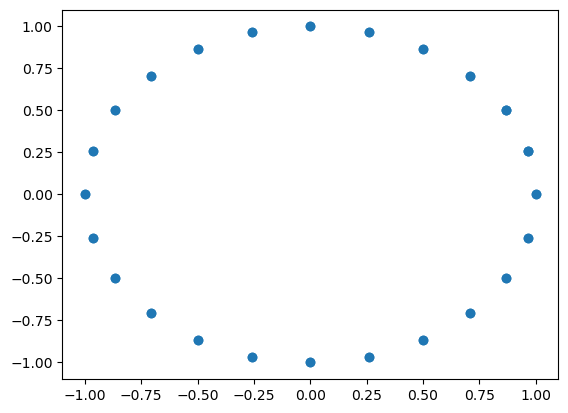

In [10]:
plt.scatter(data['hour_cos'], data['hour_sin'])
plt.show()

As an advanced approach we can use the `FunctionTransformer` from the `sklearn` library.
Similarly to the `sin_transformer`, define a `cos_transformer`. Next, define the `hour_cos` column of the `hour_df` dataframe the encoding of the `hours` column.

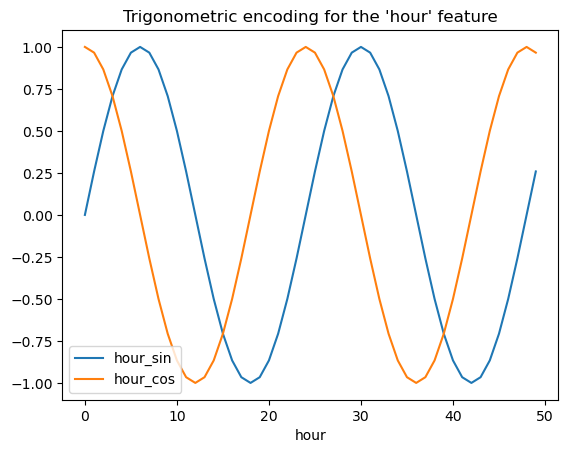

In [11]:
from sklearn.preprocessing import FunctionTransformer

def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(cycl_encod_fun(x, period)))

# create a cos transformer based on the above
def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(cycl_encod_fun(x, period)))


# dataframe with 24 hours
hour_df = pd.DataFrame(
    np.arange(50).reshape(-1, 1),
    columns=["hour"],
)

hour_df["hour_sin"] = sin_transformer(24).fit_transform(hour_df["hour"])
# do the same but for cosine
hour_df["hour_cos"] = cos_transformer(24).fit_transform(hour_df["hour"])
hour_df.plot(x = "hour")
_ = plt.title("Trigonometric encoding for the 'hour' feature")

Here, we compare if the same distance is maintaned. Your task is to transform the `hour` column of `hours_df_2` using cyclical encoding so into `hour_sin` and `hour_cos` columns.

In [12]:
hour_df_2 = pd.DataFrame({'hour': [1,3,23,13]})
# transform the values using the transformers as we did above

# sine transformation
hour_df_2["hour_sin"] = sin_transformer(24).fit_transform(hour_df_2["hour"])
# cosine transformation
hour_df_2["hour_cos"] = cos_transformer(24).fit_transform(hour_df_2["hour"])

print(hour_df_2)

   hour  hour_sin  hour_cos
0     1  0.258819  0.965926
1     3  0.707107  0.707107
2    23 -0.258819  0.965926
3    13 -0.258819 -0.965926


The following code will show as, how the distances between the values became "cyclical". If the distance between hour 1 and 3 and between hour 23 and 1 are not the same, you made somewhere a mistake.

In [13]:
# distance matrix
from scipy.spatial.distance import cdist
df_array = hour_df_2[["hour_sin", "hour_cos"]].to_numpy()
dist_mat = cdist(df_array, df_array)
pd.DataFrame(dist_mat, columns = hour_df_2["hour"], index = hour_df_2["hour"])

hour,1,3,23,13
hour,,,,
1,0.000000,0.517638,0.517638,2.000000
3,0.517638,0.000000,1.000000,1.931852
23,0.517638,1.000000,0.000000,1.931852
13,2.000000,1.931852,1.931852,0.000000


## Power transformations

In [14]:
#@title Form creating the data (It is supposed to be hidden ;))
original_data = np.random.normal(size = 1000)
transf_data_1 = np.zeros(len(original_data))
for i in range(len(original_data)):
  for j in range(10):
    transf_data_1[i] += original_data[i]**j/ np.math.factorial(j)

transf_data_2 = (original_data*original_data/original_data)**2


To show a simple example of power transformation, we are provided two datasets. Your task is to find the right lambda that will transform the data using the Box-cox transformation. First, complete the code for the Box-cox transformation according to the equation in slides.

In [15]:
def my_box_cox(x, lambda_par = 0):
  if lambda_par == 0:
    return np.log(x)
  else:
    return (pow(x, lambda_par) - 1)/lambda_par

Below is the histogram of the `transf_data_2` you need to transform. You can see, that it has a high skewness.


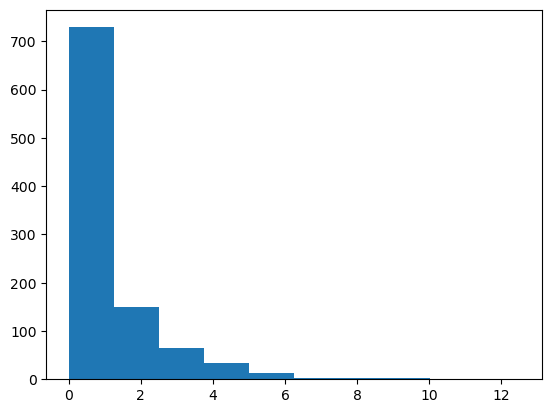

In [16]:
_ = plt.hist(transf_data_2)
plt.show()

Second, try to find the lambda that will reshape the empirical distribution of the data to a normal-like distribution. The lambda will be from the interval $\langle0,0.5\rangle$. finally, print the best labmda value.

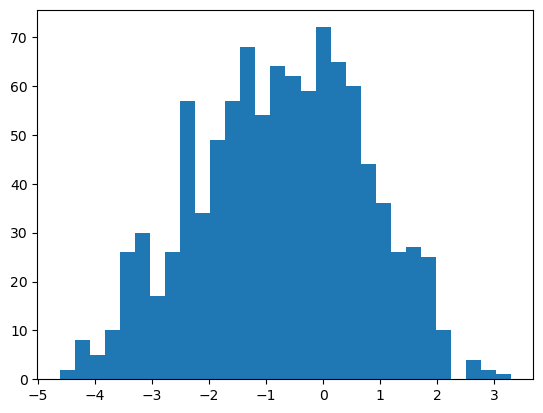

In [17]:
lambda_1 = 0.2
_ = plt.hist(my_box_cox(transf_data_2,lambda_1), bins=30)
plt.show()

Alterntatively, to transofrm `transf_data_2`, we can use the Box-Cox transformation. Your task is now to study the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html) for `PowerTransformer` and apply it on the data to produce a Box-Cox transformed vector. The library will find the best lambda value. Also, set the `standardize` parameter to `False`. Finally you can inspect the plot of the variable, if it is really normal like.

In [18]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(standardize=False)
data_transf = pt.fit_transform(transf_data_2.reshape(-1, 1)).flatten()
# add code to obtain lambdas below
print(f"Lambdas fitted: {pt.lambdas_}")


Lambdas fitted: [-1.05519594]


Finally, inspect the histogram to see the result.

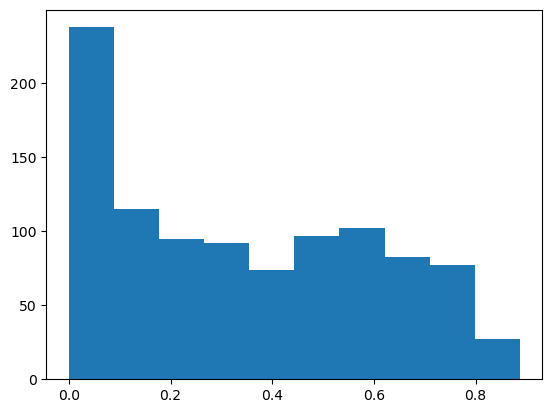

In [19]:
_ = plt.hist(data_transf)
plt.show()

## One-hot encoding
In the following part we perform the one-hot encoding. In this technique we divide a categorical feature into:
* $k$ categories
* $k-1$ categories for methdos as regression. If we woukd use $k$ columns, then they would sum up to the column of ones that we pass to the method.

How do we interpret these values in regression?
Below we have an example of a data frame with a single categorical feature `class`
.

In [20]:
categ_df = pd.DataFrame({'class': ['a', 'a', 'b', 'b', 'a', 'a', 'c', 'c', 'c'],
                   'value': np.arange(0,9)})
categ_df

,class,value
0,a,0
1,a,1
2,b,2
3,b,3
4,a,4
5,a,5
6,c,6
7,c,7
8,c,8


To encode the data frame, try to use the `get_dummies` method from `pandas`. Look at the [`documentation`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) what arguments you need to specify the **columns** for the transformation as a list as and set a **prefix** "class" for the one hot encoded columns. After the one hot encoding, the `class` should be replaced by 3 new columns: class_a, class_b, class_c.

In [21]:
ohe_df = pd.get_dummies(categ_df, prefix = "class", columns = ["class"])
ohe_df

,value,class_a,class_b,class_c
0,0,True,False,False
1,1,True,False,False
2,2,False,True,False
3,3,False,True,False
4,4,True,False,False
5,5,True,False,False
6,6,False,False,True
7,7,False,False,True
8,8,False,False,True


Similar proces can be applied using the [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) from sklearn. Here, we can not directly specify the columns for which to do one-hot encoding, but we cann pass a list of columns as keys to the dataframe for which the one-hot encoding will be performed. Then, we just add the column names and create a dataframe

In [22]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
fit_transf_array  = ohe.fit_transform(categ_df[['class']])
fit_transf_df = pd.DataFrame(fit_transf_array, columns = ohe.get_feature_names_out())
fit_transf_df

,class_a,class_b,class_c
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,0.0,0.0,1.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0


#### A code for linear regression
To find the coefficients in the linear regression, we will use the approach from the previous lab, based on the QR factorization and backsubstitution.

In [23]:
# gram schmidt ortogonalization
def gram_schmidt_orto(A):
    n, m = A.shape # get the shape of A
    Q = np.zeros((n, m), dtype = np.float64) # initialize matrix Q
    for i in range(m):
      q = A[:, i]
      for j in range(i):
        q = q - (Q[:, j].T @ A[:, i]) * Q[:, j]
      if np.linalg.norm(q) == 0:
        raise Exception("Linearly dependent vector")
      Q[:, i] = q / np.linalg.norm(q)
    return Q

# QR factorization
def QR_factorization(A, GS_alg = None):
    n, m = A.shape
    Q = GS_alg(A)
    R = Q.T @ A
    return Q, R

# backsubstitution
def backsubstitution(A, b):
  x = np.zeros(A.shape[0]) # vector of solutions
  inds=list(range(A.shape[0]))
  for i in inds[::-1]:
    j = inds.copy()
    j.pop(i)
    x[i] = (-A[i,j] @ x[j] + b[i]) / A[i,i]
  return x

# least sauqres, returns vector of coefficients, the X vector needs to be padded with ones
# if the X is padded from right by ones, the last returned coefficient is the intercept
def solve_least_squares(X,y, pad_X_by_ones=True):
  if pad_X_by_ones: # stack X by vector of ones
    X=np.hstack((X, np.ones((X.shape[0],1))))
  Q,R = QR_factorization(X, GS_alg = gram_schmidt_orto)
  return backsubstitution(R, Q.T @ y)

## More columns in the real estate data

We have a new dataset containing real estate data, similar to the one used in the previous lab. First, check what columns it contains.

In [24]:
reg_df = pd.read_csv("https://drive.google.com/uc?id=1S3ntOUkw60f1dU5nrQCFBR3epWdASA9S")
print(reg_df.info())
reg_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       414 non-null    int64  
 1   X1.transaction.date              414 non-null    float64
 2   X2.house.age                     414 non-null    float64
 3   X4.number.of.convenience.stores  414 non-null    int64  
 4   X5.latitude                      414 non-null    float64
 5   X6.longitude                     414 non-null    float64
 6   y                                414 non-null    float64
 7   house_type                       414 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 26.0+ KB
None


,Unnamed: 0,X1.transaction.date,X2.house.age,X4.number.of.convenience.stores,X5.latitude,X6.longitude,y,house_type
0,1,2012.917,32.0,10,24.98298,121.54024,180883.998018,newbuilt
1,2,2012.917,19.5,9,24.98034,121.53951,181006.917698,newbuilt
2,3,2013.583,13.3,5,24.98746,121.54391,181174.277464,newbuilt
3,4,2013.500,13.3,5,24.98746,121.54391,179713.052437,socialist
4,5,2012.833,5.0,5,24.97937,121.54245,180580.581102,newbuilt


Did you notice that the data contains a categorical feature? As linear regression works only with numerical data, we need to one hot encode the feature. Below, use the `pandas` function to one-hot encode the categorical features.

In [25]:
reg_df_oh = pd.get_dummies(reg_df, drop_first=True)
reg_df_oh

,Unnamed: 0,X1.transaction.date,X2.house.age,X4.number.of.convenience.stores,X5.latitude,X6.longitude,y,house_type_penthouse,house_type_socialist
0,1,2012.917,32.0,10,24.98298,121.54024,180883.998018,False,False
1,2,2012.917,19.5,9,24.98034,121.53951,181006.917698,False,False
2,3,2013.583,13.3,5,24.98746,121.54391,181174.277464,False,False
3,4,2013.500,13.3,5,24.98746,121.54391,179713.052437,False,True
4,5,2012.833,5.0,5,24.97937,121.54245,180580.581102,False,False
...,...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,0,24.94155,121.50381,179926.364273,False,False
410,411,2012.667,5.6,9,24.97433,121.54310,180186.110494,True,False
411,412,2013.250,18.8,7,24.97923,121.53986,180518.256152,True,False
412,413,2013.000,8.1,5,24.96674,121.54067,181200.022761,False,False


Now, we perform the regression. Use the `solve_least_squares` method with `pad_X_by_ones` parameter set to `True` to obtain regression ocefficients and store them in `reg_coeffs` variable.

In [26]:
X = reg_df_oh.loc[:, reg_df_oh.columns != 'y']
y_real = reg_df_oh['y'].to_numpy().reshape(-1,1)
reg_coeffs = solve_least_squares(X, y_real, pad_X_by_ones=True)

 If the Gram-Schmidt algorithm threw an exception, you may need need to remove one of the one-hot encoded columns, as now they create a linear combination. Therefore, in the cell with one-hot encoding, you need to encode the $k$ categories into $k-1$ binary variables if you did not do so.

 To predict the values, please create a function that will predict the response for a feature matrix with intercept `X` using linear regression, where the coefficients are passed as the `coeffs` paramter.



In [27]:
def get_estimated_response(X, coeffs):
  # Add intercept if necessary
  if coeffs[0] != 0:
    X = np.hstack((np.ones((X.shape[0], 1)), X))
  # return the prediction
  y_pred = np.dot(X, coeffs)

  return y_pred

Now, perform the estimation of the response usign the `get_estimated_response` function.

In [28]:
y_fitted = get_estimated_response(X, reg_coeffs)

To estimate how well we fitted the data, we can use a measure as for example the rooted mean squarred error:
$RMSE=\sqrt{ \frac{1}{n} (y-\hat{y})^T (y-\hat{y}) }$. Below finish the equation to compute $RMSE$.

In [29]:
def rmse(y_real, y_fitted):
  error = np.sqrt(np.mean(np.square(y_fitted - y_real))) 
  return error

print(f"RMSE: {rmse(y_real, y_fitted)}")

RMSE: 302502.88316877803


## Nonmandatory part: Natural language processing
### TF-IDF
Considering a text matrix, try to calculate term frequency - inverse document frequency (*TF-IDF*). You can find the equations in slides.
In the files, create a new folder named texts. Upload there the 6 text files from the [*president_speeches.zip*](https://drive.google.com/file/d/135yIT0WnL7D6j1Rz1zH70ti3Q5e2QTqb/view?usp=drive_link) file that which in the same directory as this notebook.

The code below processes the documents

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
import glob
import pandas as pd
#pd.set_option('max_rows', 600)
from pathlib import Path
directory_path = "texts"
text_files = glob.glob(f"{directory_path}/*.txt")
text_titles = [Path(text).stem for text in text_files]
text_titles


[]

Below is an example of how to use `CountVectorizer`, a text processer from `sklearn`, to create a Document term matrix. Also, we have passed stop words to the vectorizer, to omit the frequent words with almost no meaning.

In [41]:
vectorizer = CountVectorizer(stop_words="english")
dtm_vector = vectorizer.fit_transform(text_files)
DTM = pd.DataFrame(dtm_vector.toarray(), index=text_titles, columns=vectorizer.get_feature_names_out())
DTM

ValueError: empty vocabulary; perhaps the documents only contain stop words


Fill the bodies of the functions below to obtain the tf-idf matrix. You can use the DTM to simplify your computations.




In [ ]:
def tf(w, d, freq_fun):
  DTM.

def idf(w, D, freq_fun):
  pass

def TFIDF(w, d, D, tf = tf, idf = idf):
  pass

Extract the tf idf below for the words: war, peace, people.

 Below, compare your result with with `sklearn.TfidfVectorizer` result. To work with the vectorizer you can check the [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) or a [tutorial on sklearn tf-idf](https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/03-TF-IDF-Scikit-Learn.html).



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer